**Notebook: Deep Learning Fundamentals**

### 1. Introduction:

#### 1.1 What is Deep Learning?
Deep Learning (DL) is a subset of machine learning that involves neural networks with three or more layers. It attempts to simulate the human brain's structure and function to allow machines to learn and make decisions. Key components include neurons, layers, and activation functions.





## Deep Learning: A Neural Journey

Deep Learning might sound complex, but it's essentially inspired by the human brain! Imagine neurons as tiny information processors connected through a vast network, just like in our minds. Here's a visual breakdown:

**1. Neurons:**

Think of these as the building blocks of Deep Learning. Each neuron receives information (inputs), processes it, and sends a signal (output) to other neurons. Imagine them as tiny decision-makers, analyzing and relaying messages.



**2. Layers:**

Neurons are stacked in layers, creating a complex information highway. The "deep" in Deep Learning refers to this layered structure, allowing for increasingly complex processing as information travels through the network.



**3. Activation Functions:**

These are the gatekeepers, deciding whether a neuron's output is strong enough to be passed along. Imagine them as thresholds, ensuring only relevant information gets through, preventing the network from overloading.



**The Journey of Information:**

* Data (images, text, etc.) enters the network as inputs.
* Neurons in the first layer analyze the data, extracting features.
* Outputs from the first layer become inputs for the next layer, and so on, with each layer building upon the previous one's understanding.
* Deeper layers extract more intricate features, leading to complex decisions or predictions.

**Think of it like this:**

* Imagine showing a child a picture of a cat. They might recognize basic features like whiskers and fur.
* Deep Learning is like showing the same picture to a highly trained animal expert. They'd not only recognize the cat but also its breed, posture, and even emotions.

This layered learning process is what makes Deep Learning so powerful, allowing machines to learn from vast amounts of data and make remarkable decisions in various fields, from self-driving cars to medical diagnosis.



#### 1.2 Motivation:
DL has shown remarkable success in various fields, such as image and speech recognition, natural language processing, and autonomous vehicles. Real-world applications include facial recognition, language translation, and self-driving cars. The ability to automatically learn and adapt from data makes DL a powerful tool in solving complex problems.

#### 1.3 Roadmap:
1. Setting Up the Environment
2. Building Blocks of Neural Networks
3. Training and Evaluation
4. Deep Learning Architectures
5. Fine-Tuning and Optimization
6. Case Studies and Applications

### 2. Setting Up the Environment:

#### 2.1 Install and Import Libraries:


In [2]:
!pip install tensorflow numpy pandas matplotlib
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------------- ---------- 41.0/5


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 2.2 Import and Explore Datasets:
Load common datasets:

In [3]:
from tensorflow.keras.datasets import mnist, cifar10

# MNIST dataset (handwritten digits)
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# CIFAR-10 dataset (10 different classes of images)
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()

170498071/170498071 [==============================] - 40s 0us/step


### 3. Building Blocks of Neural Networks:

#### 3.1 Perceptron Model from Scratch:

In [4]:
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def predict(self, inputs):
        return 1 if np.dot(self.weights, inputs) + self.bias > 0 else 0

# Example usage
perceptron = Perceptron(input_size=2)

#### 3.2 Gradients and Backpropagation:
Explain the concept of gradients and backpropagation using a simple example.

#### 3.3 Visualize Decision Boundaries:

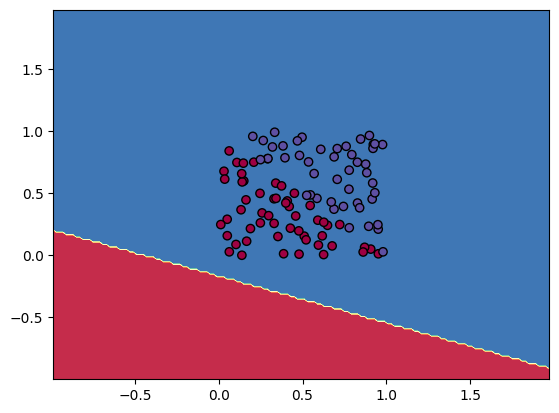

In [6]:
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = np.array([model.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.show()

# Example usage
X = np.random.rand(100, 2)  # Random 2D data
y = np.array([1 if x[0] + x[1] > 1 else 0 for x in X])  # Simple decision boundary
plot_decision_boundary(perceptron, X, y)


### 4. Training and Evaluation:

#### 4.1 Training a Neural Network:

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a simple neural network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Flatten and normalize the MNIST dataset
x_train_mnist_flat = x_train_mnist.reshape((x_train_mnist.shape[0], -1)) / 255.0
x_test_mnist_flat = x_test_mnist.reshape((x_test_mnist.shape[0], -1)) / 255.0

# Train the model
model.fit(x_train_mnist_flat, y_train_mnist, epochs=5, batch_size=32, validation_split=0.2)



Epoch 1/5


1500/1500 [==============================] - 8s 4ms/step - loss: 0.3215 - accuracy: 0.9098 - val_loss: 0.1813 - val_accuracy: 0.9496
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1587 - accuracy: 0.9546 - val_loss: 0.1350 - val_accuracy: 0.9613
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1158 - accuracy: 0.9669 - val_loss: 0.1188 - val_accuracy: 0.9651
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0899 - accuracy: 0.9745 - val_loss: 0.1074 - val_accuracy: 0.9688
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.1033 - val_accuracy: 0.9702


#### 4.2 Evaluation and Prediction:


In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_mnist_flat, y_test_mnist)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(x_test_mnist_flat[:5])

313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9708
Test Loss: 0.0934, Test Accuracy: 0.9708
1/1 [==============================] - 0s 194ms/step


### 5. Deep Learning Architectures:

#### 5.1 Convolutional Neural Networks (CNNs):

**Overview:**
Convolutional Neural Networks (CNNs) are specialized neural networks designed for processing structured grid data, such as images. CNNs have revolutionized computer vision tasks by automatically learning hierarchical features from raw pixel values.

**Key Components:**
- **Convolutional Layers:** These layers apply convolution operations to input data, allowing the network to learn spatial hierarchies of features.
- **Pooling Layers:** Pooling layers reduce the spatial dimensions of the input data, helping to decrease computation and improve translation invariance.
- **Activation Functions:** Commonly used activation functions in CNNs include ReLU (Rectified Linear Unit) to introduce non-linearity.
- **Fully Connected Layers:** These layers process the high-level features learned by the convolutional layers and make final predictions.

**Application to Image Data:**
- **Example Code:**

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

**Use Case:**
- Image Classification: CNNs excel in tasks such as image classification, where hierarchical features play a crucial role.

#### 5.2 Recurrent Neural Networks (RNNs):

**Overview:**
Recurrent Neural Networks (RNNs) are designed for processing sequential data by maintaining a hidden state that captures information from previous inputs. This architecture is well-suited for tasks such as natural language processing and time series analysis.

**Key Components:**
- **Recurrent Layers:** These layers allow information to persist, capturing dependencies in sequential data.
- **Hidden State:** The hidden state of the network carries information from previous time steps to the current one.
- **Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU):** These are specialized recurrent layers designed to address the vanishing gradient problem in traditional RNNs.

**Use in Sequential Data Tasks:**
- **Example Code:**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the number of timesteps and features
timesteps = 10
features = 20

# Create a simple RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(timesteps, features)))
model_rnn.add(Dense(10, activation='softmax'))




**Applications:**
- **Natural Language Processing (NLP):** RNNs are widely used for tasks such as text generation, sentiment analysis, and language translation.
- **Time Series Analysis:** RNNs can predict future values in time series data, making them valuable for tasks like stock price prediction.

Understanding CNNs and RNNs expands the toolkit for solving complex problems in computer vision and sequential data analysis, respectively. These architectures, often used in combination, form the foundation for many state-of-the-art deep learning applications.



### 6. Fine-Tuning and Optimization:

#### 6.1 Hyperparameter Tuning:
Optimize hyperparameters to improve model performance.

#### 6.2 Regularization:
Implement regularization techniques like dropout to prevent overfitting.

### 7. Case Studies and Applications:

#### 7.1 Image Classification:
Apply deep learning to image classification using CIFAR-10 dataset.

#### 7.2 Natural Language Processing (NLP):
Explore NLP tasks such as sentiment analysis or text generation.

### Conclusion:

Summarize key takeaways, encourage further exploration, and provide resources for advanced learning.

This comprehensive guide covers the fundamentals of deep learning, from setting up the environment to implementing basic neural network components and exploring more advanced architectures and applications. It is designed to equip students with the knowledge and skills necessary to delve into the exciting field of deep learning.